# 02 Neural Network Classification using Pytorch

In [1]:
import torch
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from torch import nn  #neural networks
print(torch.__version__)

2.7.1+cu118


## 1. Data

In [2]:
n_samples=1000
X,Y=make_circles(n_samples,noise=0.03,random_state=42)
len(X),len(Y)

(1000, 1000)

In [3]:
print(f"X shape: {X.shape}, y shape: {Y.shape}\n ")
# Convert to tensors
print(f"first 5 samples of X:\n {X[:5]},\n \n first 5 samples of y:\n {Y[:5]}")

X shape: (1000, 2), y shape: (1000,)
 
first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]],
 
 first 5 samples of y:
 [1 1 1 1 0]


In [4]:
#making Dataframe of circle data
circles=pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':Y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


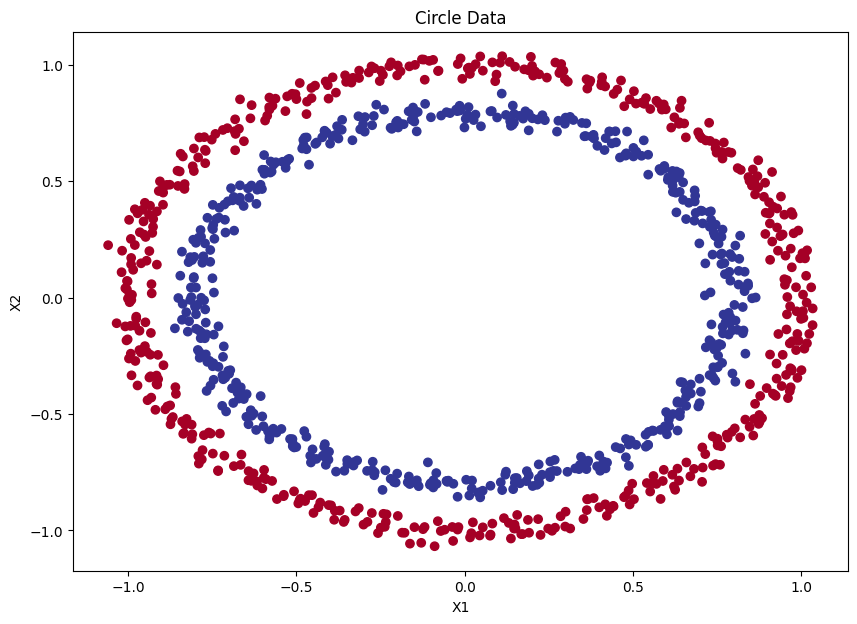

In [5]:
#visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circle Data')
plt.show()

### 1.1 Check inputs and output shapes

In [6]:
X.shape, Y.shape

((1000, 2), (1000,))

In [7]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [8]:
#view the first example of X and Y
print(f"First example of X: {X[0]}\nFirst example of Y: {Y[0]}")
print(f'shape of X: {X[0].shape}, shape of Y: {Y[0].shape}')

First example of X: [0.75424625 0.23148074]
First example of Y: 1
shape of X: (2,), shape of Y: ()


### 1.2 Turn the data into tensors

In [9]:
# turn the data into tensors
X=torch.from_numpy(X).type(torch.float)
Y=torch.from_numpy(Y).type(torch.float)
X[:5],Y[:5],X.dtype,Y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32,
 torch.float32)

In [10]:
#split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a Model

In [11]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [12]:
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer_1=nn.Linear(in_features=2,out_features=5)#takes 2 features and upscales to 10 features
#         self.layer_2=nn.Linear(in_features=5,out_features=7)#takes 10 features from previous layer and upscales to 25 features
#         self.layer_3=nn.Linear(in_features=7,out_features=1)#takes 25 features from previous layer and downscales to 1 feature (binary classification)

    
#     def forward(self,x):
#         return self.layer_3(self.layer_2(self.layer_1(x)))
    
# model_0=CircleModelV0().to(device=device)
# model_0

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),  # input layer
    nn.Linear(in_features=5,out_features=7),  # hidden layer
    nn.Linear(in_features=7,out_features=1)   # output layer
).to(device=device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=7, bias=True)
  (2): Linear(in_features=7, out_features=1, bias=True)
)

In [13]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.7022,  0.4834],
                      [ 0.0971,  0.2483],
                      [-0.2338,  0.1801],
                      [ 0.0786,  0.3516],
                      [-0.1832, -0.6927]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1508, -0.0713,  0.2805, -0.2589,  0.0528], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3767, -0.4030, -0.2858, -0.1445, -0.1119],
                      [-0.4208, -0.2800,  0.4248, -0.2178,  0.4045],
                      [-0.3039, -0.0862, -0.4335, -0.4244, -0.3294],
                      [-0.1443, -0.1829,  0.4467,  0.3023,  0.3144],
                      [-0.1047, -0.0061, -0.1688,  0.3257, -0.2591],
                      [-0.1901, -0.2353,  0.4021,  0.1533, -0.4361],
                      [-0.2319, -0.2046, -0.1769, -0.4421, -0.2705]], device='cuda:0')),
             ('1.bias',
              tensor([ 0.0569,  0.0674, -0.0086,  0.3432,  0.2053, -0.3141, -0.3

In [14]:
with torch.inference_mode():
    untrained_preds=model_0(X_test.to(device))
    print(f"Untrained model first 10 predictions:\n{untrained_preds[:10]},\n\nShape: {untrained_preds[:10].shape}, \n\nlength: {len(untrained_preds)},")

Untrained model first 10 predictions:
tensor([[ 1.0022e-02],
        [-4.5434e-05],
        [-7.1211e-02],
        [ 3.3484e-02],
        [-2.4205e-01],
        [-2.4687e-01],
        [-1.3981e-01],
        [-1.9805e-01],
        [-6.3882e-02],
        [-2.6080e-03]], device='cuda:0'),

Shape: torch.Size([10, 1]), 

length: 200,


### 2.1 Setup Loss function and Optimizer

In [15]:
loss_fn=nn.BCEWithLogitsLoss() #binary cross entropy with logits loss it has sigmoid activation function built in
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1) #stochastic gradient descent optimizer

In [16]:
# Calculate the Accuracy- out of 100 examples, how many are correct?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

## 3. Train Model